# PanSTARRS - WISE crossmatch: Load and filter catalogues

First step in the maximum likelihood crossmatch between PanSTARRS and WISE.

The software depends on numpy, astropy, pandas and wquantiles (which can be installed using pip).

The input data is expected to be in a directory called "data".

In [1]:
import numpy as np
from astropy.table import Table
from wquantiles import median as wmedian
import os

In [2]:
from mltier1 import describe, Field

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This is the object representing the region considered. It can be used to filter the catalogues and to compute the area.

In [4]:
field = Field(216.0, 220.0, 32.25, 35.6)

In [5]:
field_full = field

## PanSTARRS

### Load PanSTARRS catalogue

In [7]:
base_panstarrs = Table.read(os.path.join("data", "bootes_full_jsabater.fit"))

In [8]:
len(base_panstarrs)

297094

The original PanSTARRS catalogue in the Bootes region has ~300 K sources. The columns are the following:

In [9]:
np.array(base_panstarrs.colnames)

array(['objID', 'raStack', 'decStack', 'raStackErr', 'decStackErr',
       'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'nStackDetections',
       'nDetections', 'qualityFlag', 'gFApFlux', 'gFApFluxErr', 'gFlags',
       'rFApFlux', 'rFApFluxErr', 'rFlags', 'iFApFlux', 'iFApFluxErr',
       'iFlags', 'zFApFlux', 'zFApFluxErr', 'zFlags', 'yFApFlux',
       'yFApFluxErr', 'yFlags', 'gPSFMag', 'gPSFMagErr', 'rPSFMag',
       'rPSFMagErr', 'iPSFMag', 'iPSFMagErr', 'zPSFMag', 'zPSFMagErr',
       'yPSFMag', 'yPSFMagErr'], 
      dtype='<U16')

### Description of the data

The coordinates of the PanSTARRS data are:

In [10]:
describe(base_panstarrs['decMean'])
describe(base_panstarrs['raMean'])
describe(base_panstarrs['decStack'])
describe(base_panstarrs['raStack'])

33.930 +/- 0.964; median: 33.930; limits: [32.250, 35.600]; N=297094 (0 NaN; 0 masked)
218.027 +/- 1.152; median: 218.039; limits: [216.000, 220.000]; N=297094 (0 NaN; 0 masked)
33.930 +/- 0.964; median: 33.930; limits: [32.250, 35.600]; N=297094 (0 NaN; 0 masked)
218.027 +/- 1.152; median: 218.039; limits: [216.000, 220.000]; N=297094 (0 NaN; 0 masked)


In [11]:
describe(base_panstarrs['iFApFlux'])
describe(base_panstarrs['iFApFluxErr'])

-6.213 +/- 78.537; median: 0.000; limits: [-999.000, 0.203]; N=297094 (588 NaN; 1844 masked)
-6.213 +/- 78.537; median: 0.000; limits: [-999.000, 0.020]; N=297094 (588 NaN; 1844 masked)


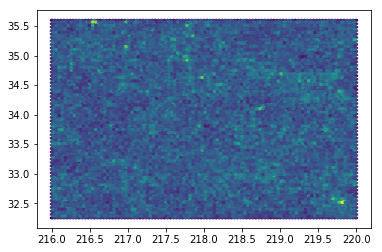

In [12]:
hexbin(base_panstarrs["raMean"], base_panstarrs["decMean"]);

#### Areas without forced photometry

There are no areas without forced photometry data in the Bootes region.

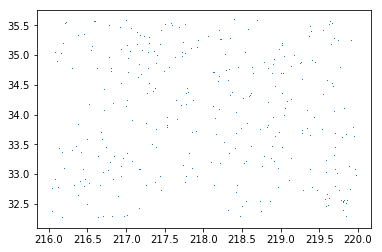

In [13]:
plot(base_panstarrs["raMean"][np.isnan(base_panstarrs['iFApFlux'])],
     base_panstarrs["decMean"][np.isnan(base_panstarrs['iFApFlux'])],
     ls="", marker=",");

The next figure is the distribution of sources with wrong values for the forced photometry in i-band but which were measured.

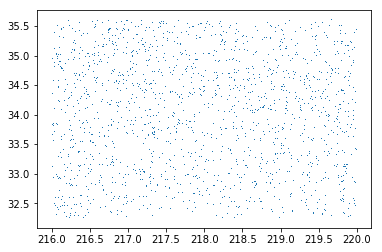

In [14]:
plot(base_panstarrs["raMean"][base_panstarrs['iFApFlux'] == -999.],
     base_panstarrs["decMean"][base_panstarrs['iFApFlux'] == -999.],
     ls="", marker=",");

#### Positional offsets
Between the Mean and Stacked computed positions

In [15]:
offset_dec = base_panstarrs['decMean']-base_panstarrs['decStack']
offset_ra = base_panstarrs['raMean']-base_panstarrs['raStack']

In [16]:
describe(offset_ra, decimals=7)
describe(offset_dec, decimals=7)

-0.0000167 +/- 0.0000665; median: -0.0000133; limits: [-0.0006256, 0.0005135]; N=297094 (0 NaN; 0 masked)
-0.0000162 +/- 0.0000590; median: -0.0000139; limits: [-0.0004645, 0.0004957]; N=297094 (0 NaN; 0 masked)


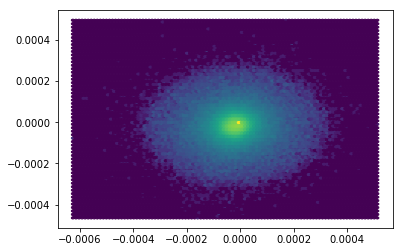

In [17]:
hexbin(offset_ra, offset_dec, bins='log')

#### Stacked magnitudes

In [18]:
describe(base_panstarrs['gPSFMag'])
describe(base_panstarrs['gPSFMagErr'])

-40.904 +/- 247.226; median: 23.013; limits: [-999.000, 35.040]; N=297094 (0 NaN; 18546 masked)
-8.583 +/- 104.791; median: 0.169; limits: [-999.000, 12382.000]; N=297094 (0 NaN; 2890 masked)


In [19]:
describe(base_panstarrs['rPSFMag'])
describe(base_panstarrs['rPSFMagErr'])

-18.066 +/- 198.401; median: 22.287; limits: [-999.000, 33.862]; N=297094 (0 NaN; 11675 masked)
-7.576 +/- 91.002; median: 0.106; limits: [-999.000, 3750.210]; N=297094 (0 NaN; 2414 masked)


In [20]:
describe(base_panstarrs['iPSFMag'])
describe(base_panstarrs['iPSFMagErr'])

-12.999 +/- 184.541; median: 21.826; limits: [-999.000, 34.248]; N=297094 (0 NaN; 10054 masked)
-7.226 +/- 87.304; median: 0.053; limits: [-999.000, 4395.010]; N=297094 (0 NaN; 2242 masked)


In [21]:
describe(base_panstarrs['zPSFMag'])
describe(base_panstarrs['zPSFMagErr'])

-18.399 +/- 197.154; median: 21.478; limits: [-999.000, 33.076]; N=297094 (0 NaN; 11542 masked)
-7.790 +/- 91.943; median: 0.094; limits: [-999.000, 3630.880]; N=297094 (0 NaN; 2462 masked)


In [22]:
describe(base_panstarrs['yPSFMag'])
describe(base_panstarrs['yPSFMagErr'])

-35.390 +/- 233.249; median: 21.200; limits: [-999.000, 32.307]; N=297094 (0 NaN; 16443 masked)
-7.310 +/- 106.726; median: 0.171; limits: [-999.000, 25068.400]; N=297094 (0 NaN; 2487 masked)


#### Wrong magnitudes

In [23]:
len(base_panstarrs[
        ((base_panstarrs["gPSFMag"] == - 999.) & 
         (base_panstarrs["rPSFMag"] == - 999.) &
         (base_panstarrs["iPSFMag"] == - 999.) &
         (base_panstarrs["zPSFMag"] == - 999.) &
         (base_panstarrs["yPSFMag"] == - 999.))])

101

### Filter the catalogue

Filter the PanSTARRS catalogue by selection the area in the field and removing wrong magnitudes

In [24]:
new_panstarrs = field_full.filter_catalogue(
    base_panstarrs[
      ((base_panstarrs["gPSFMag"] != - 999.) | 
       (base_panstarrs["rPSFMag"] != - 999.) |
       (base_panstarrs["iPSFMag"] != - 999.) |
       (base_panstarrs["zPSFMag"] != - 999.) |
       (base_panstarrs["yPSFMag"] != - 999.))], 
    colnames=("raMean", "decMean"))

In [25]:
len(new_panstarrs)

296993

Free memory

In [26]:
del base_panstarrs

### Estimate I-band magnitudes if they are undetected

In some cases the i-band magnitude is missing but we could derive it from the values of the other magnitude bands.

#### Pandas auxiliary catalogue

First we will create an auxiliary Pandas catalogue that will help us to work with the data.

In [27]:
panstarrs = new_panstarrs.to_pandas()

In the auxiliary catalogue we will use NaN to define the missing values for the magnitudes.

In [28]:
all_bands = ["g", "r", "i", "z", "y"]

In [29]:
for band in all_bands:
    panstarrs.loc[(panstarrs["%sPSFMag"%band] == -999.), "%sPSFMag"%band] = np.nan
    panstarrs.loc[(panstarrs["%sPSFMagErr"%band] == -999.), "%sPSFMagErr"%band] = np.nan

#### Missing values

The number of missing i-band values is:

In [30]:
len(panstarrs[np.isnan(panstarrs["iPSFMag"])])

9953

We get the statistical properties for each of the other bands with data

In [31]:
bands = ["g", "r", "z", "y"]

In [32]:
def get_diff(band):
    assert band in bands
    column = "{}PSFMag".format(band)
    mask = ((panstarrs[column] != -999.) & 
            (panstarrs["iPSFMag"] != -999.) &
            (~np.isnan(panstarrs[column])) & 
            (~np.isnan(panstarrs["iPSFMag"])))
    return panstarrs[mask][column] - panstarrs[mask]["iPSFMag"]

We use the band properties extracted in the HETDEX region

In [33]:
band_properties = {
    "g": {"mean":  1.3822, "median":  1.3089, "std": 1.1033, "n": 24033983},
    "r": {"mean":  0.5701, "median":  0.5020, "std": 0.7244, "n": 24767870},
    "z": {"mean": -0.2562, "median": -0.2604, "std": 0.5951, "n": 24694850},
    "y": {"mean": -0.4327, "median": -0.4610, "std": 0.7664, "n": 24101118},
}

Now we compute the interpolated value of "i" for the missing data. The computed values, including the measured ones, are entered in a column named "i".

In [34]:
aux_weights = np.array([1,2,2,1])
mags_i_diff = np.array([band_properties[a]["mean"] for a in bands])

In [35]:
def interpolate_i(x):
    if np.isnan(x["iPSFMag"]):
        mags_raw = x[["gPSFMag", 
                      "rPSFMag", 
                      "zPSFMag", 
                      "yPSFMag"]].values
        mags_i = mags_raw - mags_i_diff
        try:
            return wmedian(mags_i[~np.isnan(mags_raw)], 
                          aux_weights[~np.isnan(mags_raw)])
        except ValueError:
            return np.nan
    else:
        return x["iPSFMag"]

In [36]:
panstarrs["i"] = panstarrs.apply(interpolate_i, axis=1)

The error in the measurement is also computed and entered in a new column.

In [37]:
aux_err = np.array([band_properties[a]["std"]/np.sqrt(band_properties[a]["n"]) for a in bands])
def interpolate_error_i(x):
    if np.isnan(x["iPSFMagErr"]):
        err_mags_raw = x[["gPSFMagErr", 
                          "rPSFMagErr", 
                          "zPSFMagErr", 
                          "yPSFMagErr"]].values
        errs1 = err_mags_raw[~np.isnan(err_mags_raw)]
        errs2 = aux_err[~np.isnan(err_mags_raw)]
        try:
            return np.sqrt(np.sum(errs1**2) + np.sum(errs2**2))/np.sqrt(0.5*(len(errs1)+len(errs2)))
        except ValueError:
            return np.nan # There are some sources here with no errors in any band FIXME
    else:
        return x["iPSFMagErr"]

In [38]:
panstarrs["iErr"] = panstarrs.apply(interpolate_error_i, axis=1)

In [39]:
panstarrs["i"].describe()

count    296993.000000
mean         21.559625
std           1.768754
min           8.160090
25%          20.969200
50%          21.895800
75%          22.483801
max          34.248402
Name: i, dtype: float64

In [40]:
panstarrs["iErr"].describe()

count    296993.000000
mean          0.331129
std          12.281496
min           0.000172
25%           0.023573
50%           0.053293
75%           0.092032
max        4395.009766
Name: iErr, dtype: float64

### Save the data

The new data is entered in the (non-Pandas) catalogue and saved. We will only save the relevant columns to save space.

In [41]:
new_panstarrs["i"] = panstarrs["i"].values
new_panstarrs["iErr"] = panstarrs["iErr"].values

In [42]:
columns_save = ['objID', 'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'i', 'iErr']

In [43]:
new_panstarrs[columns_save].write('panstarrs_bootes_u1.fits', format="fits")

Free memory

In [44]:
del panstarrs
del new_panstarrs

## WISE

### Load the WISE data

In [45]:
base_wise = Table.read(os.path.join("data", "allwise_bootes.fits"))

In [46]:
len(base_wise)

186227

In [47]:
np.array(base_wise.colnames)

array(['designation', 'ra', 'dec', 'sigra', 'sigdec', 'sigradec', 'w1mpro',
       'w1sigmpro', 'w1snr', 'w2mpro', 'w2sigmpro', 'w2snr', 'w3mpro',
       'w3sigmpro', 'w3snr', 'w4mpro', 'w4sigmpro', 'w4snr', 'nb', 'na',
       'w1sat', 'w2sat', 'w3sat', 'w4sat', 'cc_flags', 'ext_flg',
       'var_flg', 'ph_qual', 'tmass_key', 'j_m_2mass', 'j_msig_2mass',
       'h_m_2mass', 'h_msig_2mass', 'k_m_2mass', 'k_msig_2mass'], 
      dtype='<U12')

### Describe data

In [48]:
describe(base_wise['ra'])
describe(base_wise['dec'])

217.997 +/- 1.141; median: 218.008; limits: [216.000, 220.000]; N=186227 (0 NaN; 0 masked)
33.934 +/- 0.958; median: 33.939; limits: [32.250, 35.600]; N=186227 (0 NaN; 0 masked)


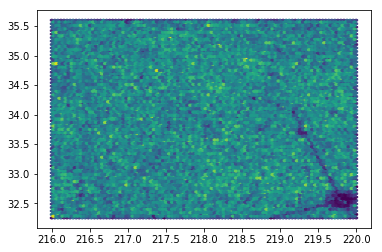

In [49]:
hexbin(base_wise["ra"], base_wise["dec"]);

### Filter the catalogue

Filter the WISE catalogue by selection the area in the field

In [50]:
new_wise = field_full.filter_catalogue(base_wise)

### Transform magnitudes

We will transform the magnitude of the W1 band from Vega to AB magnitudes

In [51]:
new_wise["W1mag"] = new_wise['w1mpro'] + 2.683

### Rename columns

Rename some columns to more common names

In [52]:
new_wise.rename_column("designation", 'AllWISE')
new_wise.rename_column("ra", 'raWise')
new_wise.rename_column("dec", 'decWise')
new_wise.rename_column("sigra", 'raWiseErr')
new_wise.rename_column("sigdec", 'decWiseErr')
new_wise.rename_column('w1sigmpro', "W1magErr")

### Save the data

We will only save the relevant columns to save space.

In [53]:
columns_save = ['AllWISE', 'raWise', 'decWise', 'raWiseErr', 'decWiseErr', 'W1mag', 'W1magErr']

In [54]:
new_wise[columns_save].write('wise_bootes_u1.fits', format="fits")